In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
def get_standardized(i):
    z=(i-i.mean())/(i.std())
    return z

In [4]:
# Standardisation function
scaled_Univ_df = get_standardized(Univ.iloc[:,1:])
scaled_Univ_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120
5,0.678850,0.644235,-0.821197,-0.668740,0.330956,0.914132
6,0.448137,0.695691,-0.466359,-0.177019,0.290956,0.914132
7,-0.105574,-0.127612,-0.770506,-0.177019,-0.503436,0.582924
8,1.232561,0.747148,-1.277417,-0.422880,0.841393,1.134936
9,0.355852,-0.076156,0.243318,-1.406321,2.170070,0.030913


In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [11]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_Univ_df)

C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Bhanu Priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0])

In [13]:
kmeans.inertia_


42.75049126219292

In [16]:
import warnings
warnings.filterwarnings("ignore")
inertia=[]
k=list(range(2,12))
for i in k:
    kc=KMeans(n_clusters=i)
    kc.fit(scaled_Univ_df)
    inertia.append(kc.inertia_)
    print(i,inertia)

2 [61.57947259209858]
3 [61.57947259209858, 42.75049126219292]
4 [61.57947259209858, 42.75049126219292, 33.40428240562344]
5 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037]
6 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167]
7 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167, 18.090593818459155]
8 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167, 18.090593818459155, 15.321435144635835]
9 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167, 18.090593818459155, 15.321435144635835, 12.808434242009318]
10 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167, 18.090593818459155, 15.321435144635835, 12.808434242009318, 10.58424597618821]
11 [61.57947259209858, 42.75049126219292, 33.40428240562344, 25.39704081258037, 21.765318236210167, 18.

In [18]:
k

[2, 3, 4, 5, 6, 7]

Text(0, 0.5, 'inertia')

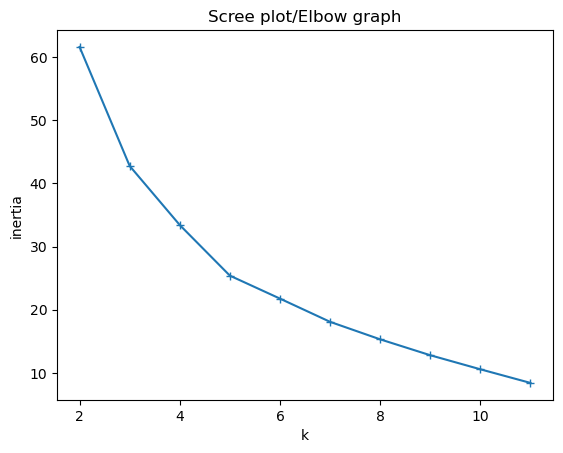

In [17]:
plt.plot(k,inertia,marker='+')
plt.title("Scree plot/Elbow graph")
plt.xlabel("k")
plt.ylabel("inertia")

wcss = []
k=range(2,16)
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_/25)

plt.plot(k, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [27]:
help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is ``2 <= n_labels <= n_samples - 1``.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indi

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_Univ_df)
labels_3=kmeans.labels_
labels_3

array([1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2])

In [19]:
from sklearn.metrics import silhouette_score
ss_3=silhouette_score(scaled_Univ_df,labels_3)

In [20]:
ss_3

0.32207574374941067

In [21]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=5)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=5)

In [22]:
labels_5=clusters_new.labels_

In [23]:
ss_5=silhouette_score(scaled_Univ_df,labels_5)

In [24]:
print(ss_3,ss_5)

0.32207574374941067 0.3129547058390266


In [25]:
#Assign clusters to the data set
Univ['clusterid_new'] = labels_3

In [26]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [29]:
#these are standardized values.
kmeans.cluster_centers_

array([[-1.89129229, -1.94145231,  1.56128756,  1.60546806, -1.2086753 ,
        -1.65272331],
       [-0.03636036,  0.10394205,  0.04477719,  0.02786417, -0.31404067,
         0.09531404],
       [ 0.88905483,  0.72427829, -0.7536085 , -0.75069359,  0.95590992,
         0.60745831]])

In [31]:
Univ.iloc[:,1:].groupby('clusterid_new').agg(['mean'])

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
1,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222


In [24]:
Univ[Univ['clusterid_new']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,2
3,Columbia,1310,76,24,12,31510,88,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2
10,MIT,1380,94,30,10,34870,91,2
14,Princeton,1375,91,14,8,30220,95,2
16,Stanford,1360,90,20,12,36450,93,2


In [27]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
2,CMU,1260,62,59,9,25026,72,0
4,Cornell,1280,83,33,13,21864,90,0
7,Georgetown,1255,74,24,12,20126,92,0
11,Northwestern,1260,85,39,11,28052,89,0
12,NotreDame,1255,81,42,13,15122,94,0
18,UCBerkeley,1240,95,40,17,15140,78,0
19,UChicago,1290,75,50,13,38380,87,0
20,UMichigan,1180,65,68,16,15470,85,0
21,UPenn,1285,80,36,11,27553,90,0
22,UVA,1225,77,44,14,13349,92,0


In [33]:
from sklearn.cluster import DBSCAN

In [53]:
dbscan = DBSCAN(eps=1.025, min_samples=7)
labels=dbscan.fit_predict(scaled_Univ_df)

In [54]:
pd.Series(labels).value_counts()


-1    11
 0     7
 1     7
Name: count, dtype: int64

In [47]:
silhouette_score(scaled_Univ_df,labels)

0.14852642206469743